<h1><center>TP 01. Searching with elimination methods</center></h1>  <center>______________________________________________________________________________________________________________</center>



<h6 style="text-align:right;"> ACHRAF DIANI</h6>  <h6 style="text-align:right;">MOHAMMED OUALID DAOUDI</h6>

##Implementation of algorithms:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### **Perceptron learning algorithm:**  


In [ ]:
def Perceptron(X, Y):
    m = X.shape[1]
    n = X.shape[0]
    w = np.random.randn(m)
    t = 0

    while True:
        misclassified = False

        for i in range(n):
            if np.dot(w, X[i].T) * Y[i] <= 0:
                w += Y[i] * X[i]
                t += 1
                misclassified = True

        if not misclassified:
            break

    final_error = Evaluate_error(w, X, Y)
    return w, t, final_error

def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        if np.dot(w, X[i].T) * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

In [ ]:
import numpy as np
import itertools

# Your perceptron function goes here

def can_shatter(model, X, Y, subset_indices):
    X_subset = X[np.array(subset_indices)]
    Y_subset = Y[np.array(subset_indices)]

    # Ensure X_subset is always a 2D array
    if X_subset.ndim == 1:
        X_subset = X_subset.reshape(1, -1)

    subset_size = len(subset_indices)

    # Generate all possible binary labelings for subset_size points
    for labels in itertools.product([-1, 1], repeat=subset_size):
        labels = np.array(labels)

        # Train the model with the current subset and label combination
        w, t, final_error = model(X_subset, labels)

        # Make predictions using the trained weights
        predictions = np.dot(X_subset, w) > 0
        predictions = np.where(predictions, 1, -1)

        # Check if predictions match the current label combination
        if not np.all(predictions == labels):
            return False

    return True


# Function to calculate the VC dimension
def vc_dimension(model, X, Y, max_set_size):
    vc_dim = 0  # Initialize VC dimension

    for subset_size in range(1, max_set_size + 1):
        all_shattered = False
        for subset_indices in itertools.combinations(range(len(X)), subset_size):
            if can_shatter(model, X, Y, subset_indices):
                all_shattered = True
                break  # Found a shatterable subset, no need to check more

        if all_shattered:
            vc_dim = subset_size
        else:
            break  # Can't shatter any subset of this size

    return vc_dim

# Prepare your data
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

y = np.ones(num_samples)
y[:100] = -1

# Calculate VC Dimension
vc_dim = vc_dimension(Perceptron, X, y, max_set_size=2)  # Adjust max_set_size as needed
print("VC Dimension:", vc_dim)


VC Dimension: 2


### **Pocket learning algorithm:**  


In [ ]:
def Pocket(X, Y):
    n, m = X.shape
    w = np.random.randn(m)
    ws = w
    Tmax = 100

    for t in range(Tmax):
        misclassified_count = 0

        for i in range(n):
            if np.dot(w, X[i].T) * Y[i] <= 0:
                w += Y[i] * X[i]
                misclassified_count += 1

        Ls_W = misclassified_count / n
        Ls_Ws = Evaluate_error(ws, X, Y)

        if Ls_W < Ls_Ws:
            ws = w

    final_ws = ws
    final_time = Tmax
    final_error = Ls_Ws

    return final_ws, final_time, final_error

def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        if np.dot(w, X[i].T) * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

### **Adaline with delta rule:**  

In [ ]:
import numpy as np
import itertools

# Your perceptron function goes here

def can_shatter(model, X, Y, subset_indices):
    X_subset = X[np.array(subset_indices)]
    Y_subset = Y[np.array(subset_indices)]

    # Ensure X_subset is always a 2D array
    if X_subset.ndim == 1:
        X_subset = X_subset.reshape(1, -1)

    subset_size = len(subset_indices)

    # Generate all possible binary labelings for subset_size points
    for labels in itertools.product([-1, 1], repeat=subset_size):
        labels = np.array(labels)

        # Train the model with the current subset and label combination
        w, t, final_error = model(X_subset, labels)

        # Make predictions using the trained weights
        predictions = np.dot(X_subset, w) > 0
        predictions = np.where(predictions, 1, -1)

        # Check if predictions match the current label combination
        if not np.all(predictions == labels):
            return False

    return True


# Function to calculate the VC dimension
def vc_dimension(model, X, Y, max_set_size):
    vc_dim = 0  # Initialize VC dimension

    for subset_size in range(1, max_set_size + 1):
        all_shattered = False
        for subset_indices in itertools.combinations(range(len(X)), subset_size):
            if can_shatter(model, X, Y, subset_indices):
                all_shattered = True
                break  # Found a shatterable subset, no need to check more

        if all_shattered:
            vc_dim = subset_size
        else:
            break  # Can't shatter any subset of this size

    return vc_dim

# Prepare your data
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

y = np.ones(num_samples)
y[:100] = -1

# Calculate VC Dimension
vc_dim = vc_dimension(Pocket, X, y, max_set_size=2)  # Adjust max_set_size as needed
print("VC Dimension:", vc_dim)


VC Dimension: 2


In [ ]:
def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        net_input = np.dot(w, X[i].T)
        output = net_input
        if output * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

def gradient(X, Y, w):
    n = len(X)
    return -np.sum([2 * X[i] * error(X[i], Y[i], w) for i in range(n)], axis=0) / n

def error(x, y, w):
    net_input = np.dot(w, x)
    output = net_input
    return y - output

def Adaline(X,Y,w, delta = 0.2):
  n, t, Tmax = len(X), 0, 100
  lr = 0.0001 # learning rate for the gradient descent
  while np.any(np.abs(gradient(X, Y, w)) > delta) and t < Tmax:
    print(gradient(X,Y,w))
    for i in range(n):
      if error(X[i], Y[i], w) != 0 : w += 2 * X[i] * error(X[i], Y[i], w) * lr
    print("t=",t," | ",Evaluate_error(X,Y,w)," | ", gradient(X,Y,w))
    t += 1
  return w, t, Evaluate_error(X,Y,w)

In [ ]:
import numpy as np
import itertools

# Your perceptron function goes here

def can_shatter(model, X, Y, subset_indices):
    X_subset = X[np.array(subset_indices)]
    Y_subset = Y[np.array(subset_indices)]

    # Ensure X_subset is always a 2D array
    if X_subset.ndim == 1:
        X_subset = X_subset.reshape(1, -1)

    subset_size = len(subset_indices)

    # Generate all possible binary labelings for subset_size points
    for labels in itertools.product([-1, 1], repeat=subset_size):
        labels = np.array(labels)

        # Initialize the weight vector
        initial_weight_vector = np.zeros(X_subset.shape[1])  # Adjust this based on your model's requirements

        # Train the model with the current subset and label combination
        w, t, final_error = model(X_subset, labels, initial_weight_vector)

        # Make predictions using the trained weights
        predictions = np.dot(X_subset, w) > 0
        predictions = np.where(predictions, 1, -1)

        # Check if predictions match the current label combination
        if not np.all(predictions == labels):
            return False

    return True



# Function to calculate the VC dimension
def vc_dimension(model, X, Y, max_set_size):
    vc_dim = 0  # Initialize VC dimension

    for subset_size in range(1, max_set_size + 1):
        all_shattered = False
        for subset_indices in itertools.combinations(range(len(X)), subset_size):
            if can_shatter(model, X, Y, subset_indices):
                all_shattered = True
                break  # Found a shatterable subset, no need to check more

        if all_shattered:
            vc_dim = subset_size
        else:
            break  # Can't shatter any subset of this size

    return vc_dim

# Prepare your data
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

y = np.ones(num_samples)
y[:100] = -1

# Calculate VC Dimension
vc_dim = vc_dimension(Adaline, X, y, max_set_size=2)  # Adjust max_set_size as needed
print("VC Dimension:", vc_dim)


VC Dimension: 2


##Dataset Generating and visualization (2D and 3D):



### **2D data with noise:**  


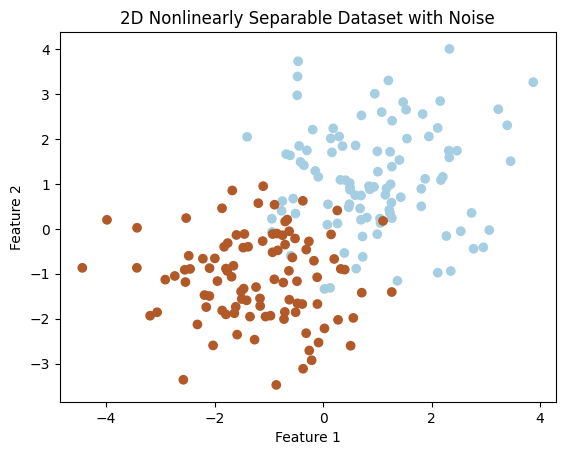

In [ ]:
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)


y = np.ones(num_samples)
y[:100] = -1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Nonlinearly Separable Dataset with Noise')
plt.show()

### **3D dataset with noise:**  


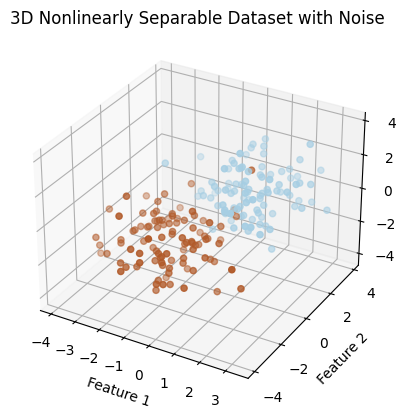

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(0)
num_samples = 200

X = np.random.randn(num_samples, 3)
X[:100] += 2 * np.random.rand(100, 3)
X[100:] -= 2 * np.random.rand(100, 3)


y = np.ones(num_samples)
y[:100] = -1


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Nonlinearly Separable Dataset with Noise')

plt.show()

##Algorithms application on dataset:

### **Pocket avec 2D noisy dataset:**  

Final Weights: [ 2.09463837 -1.32729243 -3.23340171]
Number of iterations: 100
Final Error Rate: 0.115


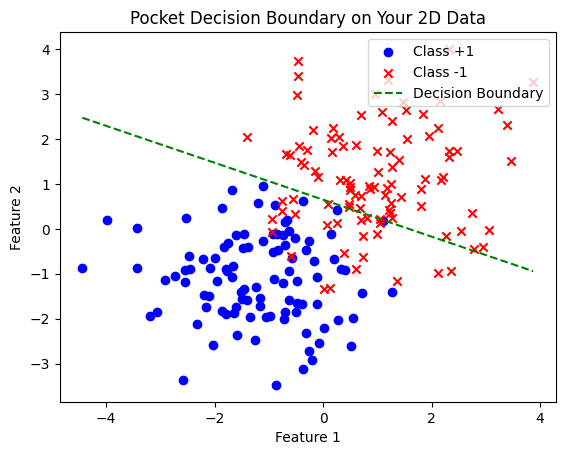

In [ ]:
#POCKET LEARNING ALGORITHM
def Pocket(X, Y):
    n, m = X.shape
    w = np.random.randn(m)
    ws = w
    Tmax = 100

    for t in range(Tmax):
        misclassified_count = 0

        for i in range(n):
            if np.dot(w, X[i].T) * Y[i] <= 0:
                w += Y[i] * X[i]
                misclassified_count += 1

        Ls_W = misclassified_count / n
        Ls_Ws = Evaluate_error(ws, X, Y)

        if Ls_W < Ls_Ws:
            ws = w

    final_ws = ws
    final_time = Tmax
    final_error = Ls_Ws

    return final_ws, final_time, final_error

def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        if np.dot(w, X[i].T) * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

# Générer la data 2D
np.random.seed(0)
num_samples = 200

X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

y = np.ones(num_samples)
y[:100] = -1

initial_weights = np.random.randn(3)

# Ajouter un terme biais a la dataset
X_bias = np.column_stack([np.ones(len(X)), X])

# Application de pocket
final_weights, iterations, error_rate = Pocket(X_bias, y)

# Montrer les résultats
print("Final Weights:", final_weights)
print("Number of iterations:", iterations)
print("Final Error Rate:", error_rate)

# Visualisation 2D
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = (-final_weights[0] - final_weights[1] * x_boundary) / final_weights[2]

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Class -1')
plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Pocket Decision Boundary on Your 2D Data')
plt.show()



### **Adaline avec 2D noisy dataset:**  


Final Weights: [-0.13647602 -0.32195018 -0.30103484]
Number of iterations: 67
Final Error Rate: 0.065


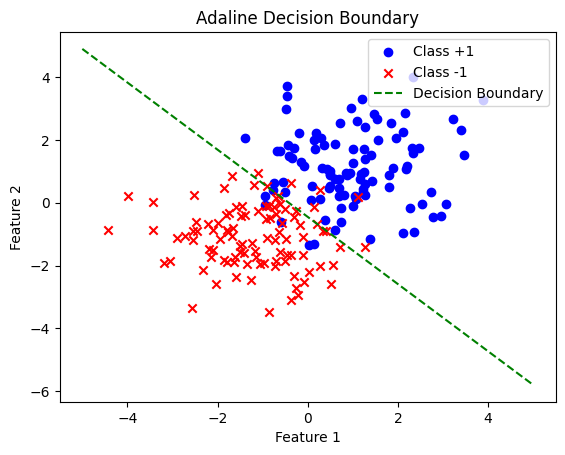

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adaline learning algorithm
def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        net_input = np.dot(w, X[i])
        output = net_input
        if output * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

def gradient(X, Y, w):
    n = len(X)
    return -np.sum([2 * X[i] * error(X[i], Y[i], w) for i in range(n)], axis=0) / n

def error(x, y, w):
    net_input = np.dot(w, x)
    output = net_input
    return y - output

def Adaline(X, Y, w, delta=0.2):
    n, t, Tmax = len(X), 0, 100
    lr = 0.0001
    while np.any(np.abs(gradient(X, Y, w)) > delta) and t < Tmax:
        for i in range(n):
            if error(X[i], Y[i], w) != 0:
                w += 2 * X[i] * error(X[i], Y[i], w) * lr
        t += 1
    error_rate = Evaluate_error(w, X, Y)
    return w, t, error_rate

# Générer la data 2D
np.random.seed(0)
num_samples = 200

X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

Y = np.ones(num_samples)
Y[:100] = -1

initial_weights = np.random.randn(3)

# Ajouter le terme biais
X_bias = np.column_stack([np.ones(len(X)), X])

# Application d'adaline
final_weights, iterations, error_rate = Adaline(X_bias, Y, initial_weights)

# Montrer les résultats
print("Final Weights:", final_weights)
print("Number of iterations:", iterations)
print("Final Error Rate:", error_rate)

# Visualisation 2D
x_boundary = np.linspace(-5, 5, 100)
y_boundary = (-final_weights[0] - final_weights[1] * x_boundary) / final_weights[2]

plt.scatter(X[:100, 0], X[:100, 1], color='blue', marker='o', label='Class +1')
plt.scatter(X[100:, 0], X[100:, 1], color='red', marker='x', label='Class -1')
plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Adaline Decision Boundary')
plt.show()

### **Pocket avec 3D noisy dataset:**  

Final Weights: [ 2.20984948 -0.89496058 -0.57236046 -0.27895472]
Number of iterations: 100
Final Error Rate: 0.33


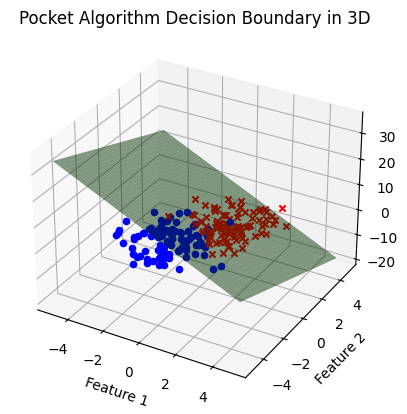

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#POCKET LEARNING ALGORITHM
def Pocket(X, Y):
    n, m = X.shape
    w = np.random.randn(m)
    ws = w
    Tmax = 100

    for t in range(Tmax):
        misclassified_count = 0

        for i in range(n):
            if np.dot(w, X[i].T) * Y[i] <= 0:
                w += Y[i] * X[i]
                misclassified_count += 1

        Ls_W = misclassified_count / n
        Ls_Ws = Evaluate_error(ws, X, Y)

        if Ls_W < Ls_Ws:
            ws = w

    final_ws = ws
    final_time = Tmax
    final_error = Ls_Ws

    return final_ws, final_time, final_error

def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        if np.dot(w, X[i].T) * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

# Générer la data 3D:
np.random.seed(0)
num_samples = 200

X = np.random.randn(num_samples, 3)
X[:100] += 2 * np.random.rand(100, 3)
X[100:] -= 2 * np.random.rand(100, 3)

y = np.ones(num_samples)
y[:100] = -1

# Ajouter un terme biais a la dataset
X_bias = np.column_stack([np.ones(len(X)), X])

# Application de Pocket
final_weights, iterations, error_rate = Pocket(X_bias, y)

# Montrer les résultats
print("Final Weights:", final_weights)
print("Number of iterations:", iterations)
print("Final Error Rate:", error_rate)

# Visualisation 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_samples):
    if y[i] == 1:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], color='blue', marker='o')
    else:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], color='red', marker='x')

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

if len(final_weights) >= 4:
    zz = (-final_weights[0] - final_weights[1] * xx - final_weights[2] * yy) / final_weights[3]
else:
    print("final_weights does not have enough elements for 3D visualization.")

ax.plot_surface(xx, yy, zz, color='green', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Pocket Algorithm Decision Boundary in 3D')

plt.show()


### **Adaline avec 3D noisy dataset:**  

Final Weights: [-0.18730924 -0.29322139 -0.17755314]
Number of iterations: 43
Final Error Rate: 0.025


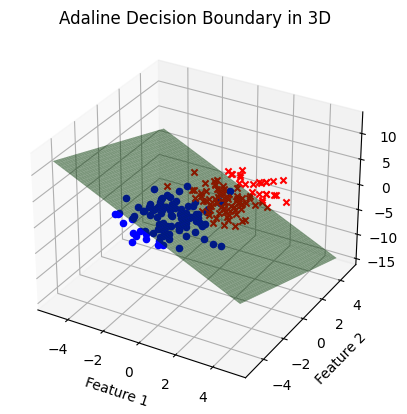

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Adaline learning algorithm
def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        net_input = np.dot(w, X[i])
        output = net_input
        if np.all(output * Y[i] <= 0):
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

def gradient(X, Y, w):
    n = len(X)
    return -np.sum([2 * X[i] * error(X[i], Y[i], w) for i in range(n)], axis=0) / n

def error(x, y, w):
    net_input = np.dot(w, x)
    output = net_input
    return y - output

def Adaline(X, Y, w, delta=0.2):
    n, t, Tmax = len(X), 0, 100
    lr = 0.0001
    while np.any(np.abs(gradient(X, Y, w)) > delta) and t < Tmax:
        for i in range(n):
            if error(X[i], Y[i], w) != 0:
                w += 2 * X[i] * error(X[i], Y[i], w) * lr
        t += 1
    error_rate = Evaluate_error(w, X, Y)
    return w, t, error_rate

# Générer la data 3D
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 3)
X[:100] += 2 * np.random.rand(100, 3)
X[100:] -= 2 * np.random.rand(100, 3)
y = np.ones(num_samples)
y[:100] = -1

initial_weights = np.random.randn(3)  # Corrected to match input dimensions

# Application d'Adaline
final_weights, iterations, error_rate = Adaline(X, y, initial_weights)

# Montrer les résultats
print("Final Weights:", final_weights)
print("Number of iterations:", iterations)
print("Final Error Rate:", error_rate)

# Visualisation 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_samples):
    if y[i] == 1:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], color='blue', marker='o')
    else:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], color='red', marker='x')

xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
zz = (-final_weights[0] - final_weights[1] * xx - final_weights[2] * yy) / final_weights[2]

ax.plot_surface(xx, yy, zz, color='green', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Adaline Decision Boundary in 3D')

plt.show()


## Empirical error evolution:

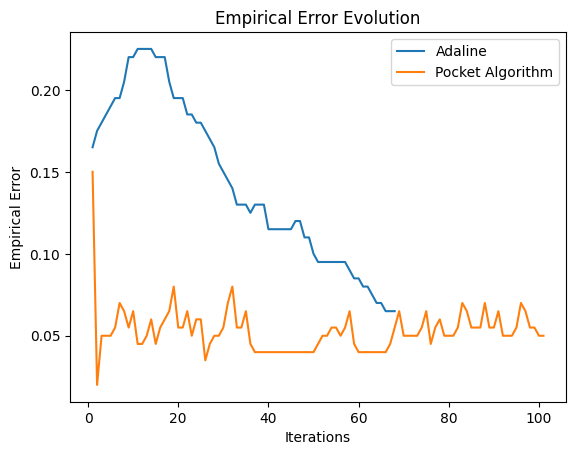

Final Adaline Weights: [-0.13647602 -0.32195018 -0.30103484]
Final Adaline Error Rate: 0.065
Final Pocket Weights: [ 2.5550598  -0.13837725 -0.95230185]
Final Pocket Algorithm Error Rate: 0.05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the 2D dataset (same dataset you provided)
np.random.seed(0)
num_samples = 200
X = np.random.randn(num_samples, 2)
X[:100] += 2 * np.random.rand(100, 2)
X[100:] -= 2 * np.random.rand(100, 2)

y = np.ones(num_samples)
y[:100] = -1

# Initialize weights for Adaline and the Pocket Algorithm
initial_weights = np.random.randn(3)  # Including bias term
adaline_weights = initial_weights.copy()
pocket_weights = initial_weights.copy()

X_bias = np.column_stack([np.ones(len(X)), X])

# Initialize functions for Adaline
def Evaluate_error(w, X, Y):
    n = X.shape[0]
    misclassified_count = 0

    for i in range(n):
        net_input = np.dot(w, X[i].T)
        output = net_input
        if output * Y[i] <= 0:
            misclassified_count += 1

    error_rate = misclassified_count / n
    return error_rate

def gradient(X, Y, w):
    n = len(X)
    return -np.sum([2 * X[i] * error(X[i], Y[i], w) for i in range(n)], axis=0) / n

def error(x, y, w):
    net_input = np.dot(w, x)
    output = net_input
    return y - output

# Initialize functions for the Pocket Algorithm
def Pocket(X, Y, w, Tmax=100):
    n = len(X)
    ws = w.copy()
    best_ws = w.copy()
    best_error = Evaluate_error(ws, X, Y)
    errors = [best_error]

    for t in range(Tmax):
        misclassified_count = 0

        for i in range(n):
            if np.dot(w, X[i].T) * Y[i] <= 0:
                w += Y[i] * X[i]
                misclassified_count += 1

        error_rate = misclassified_count / n
        errors.append(error_rate)

        if error_rate < best_error:
            best_error = error_rate
            best_ws = w.copy()

    return best_ws, errors

# Training parameters
delta = 0.2  # Delta for stopping criteria
Tmax = 100  # Maximum number of iterations

# Lists to store empirical errors at each iteration
adaline_errors = []
pocket_errors = []

# Training Adaline
t_adaline = 0

while np.any(np.abs(gradient(X_bias, y, adaline_weights)) > delta) and t_adaline < Tmax:
    for i in range(len(X_bias)):
        if error(X_bias[i], y[i], adaline_weights) != 0:
            adaline_weights += 2 * X_bias[i] * error(X_bias[i], y[i], adaline_weights) * 0.0001
    t_adaline += 1
    error_rate = Evaluate_error(adaline_weights, X_bias, y)
    adaline_errors.append(error_rate)

# Training Pocket Algorithm
pocket_weights, pocket_err = Pocket(X_bias, y, pocket_weights, Tmax)

# Ensure adaline_errors and pocket_err have the same number of iterations
if len(adaline_errors) < len(pocket_err):
    adaline_errors.append(adaline_errors[-1])

# Plot empirical error evolution
plt.plot(range(1, t_adaline + 2), adaline_errors, label='Adaline', linestyle='-')
plt.plot(range(1, len(pocket_err) + 1), pocket_err, label='Pocket Algorithm', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Empirical Error')
plt.title('Empirical Error Evolution')
plt.legend()
plt.show()

# Print final results
print("Final Adaline Weights:", adaline_weights)
print("Final Adaline Error Rate:", adaline_errors[-1])
print("Final Pocket Weights:", pocket_weights)
print("Final Pocket Algorithm Error Rate:", pocket_err[-1])
